**Assignment**:

Try SVM classifier on MNIST dataset, compare the preformance of linear, polynomial and RBF kernels.

In [23]:
import sys, os
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.svm import SVC
import pandas as pd

In [62]:
train_data=pd.read_csv('/content/mnist_train.csv')
test_data=pd.read_csv('/content/mnist_test.csv')

In [26]:
train_data.shape

(60000, 785)

In [27]:
test_data.shape

(10000, 785)

In [63]:
train_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [64]:
test_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Digit4')

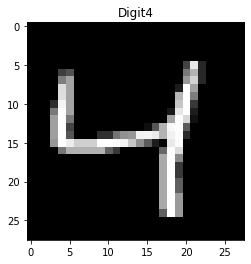

In [73]:
x = train_data.iloc[2, 1:]
x.shape
x = x.values.reshape(28,28)
plt.imshow(x, cmap='gray')
plt.title("Digit"+str(train_data.iloc[2, 0]))

In [29]:
# data types
print(train_data.info())
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 59.9 MB
None


In [30]:
# average feature values
round(train_data.drop('label', axis=1).mean(), 2)

1x1      0.0
1x2      0.0
1x3      0.0
1x4      0.0
1x5      0.0
        ... 
28x24    0.0
28x25    0.0
28x26    0.0
28x27    0.0
28x28    0.0
Length: 784, dtype: float64

In [31]:
## Separating the X and Y variable
y = train_data['label']

## Dropping the variable 'label' from X variable 
X = train_data.drop(columns = 'label')

In [32]:
X = X/255.0
test_data = test_data/255.0

print("X:", X.shape)
print("test_data:", test_data.shape)

X: (60000, 784)
test_data: (10000, 785)


In [33]:
# scaling the features
from sklearn.preprocessing import scale
X_scaled = scale(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, train_size = 0.2 ,random_state = 142)

In [35]:
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)

In [53]:
# confusion matrix and accuracy

from sklearn import metrics
from sklearn.metrics import confusion_matrix
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")
print("Precision:",metrics.precision_score(y_test, y_pred,average='macro'), "\n")
print("Recall:",metrics.recall_score(y_test, y_pred,average='macro'), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9087777777777778 

Precision: 0.907935106638406 

Recall: 0.9074709033872136 

[[1727    0    5    2    8    9   19    3   12    2]
 [   0 1943   14    3    6    2    3    4   19    4]
 [  17   21 1589   44   18    7   23   18   24    3]
 [   6   15   59 1607    8   61    3   15   44    7]
 [   6    6   23    3 1575    0   13   12    8   51]
 [  30    7   11   91   16 1420   29    2   42   18]
 [  19    5   27    1    6   15 1754    0    1    0]
 [   1   11   28    7   51    3    0 1734    4   64]
 [  11   57   27   66   10   62   14   11 1447   15]
 [   3   10   12   25   77    8    0  101   14 1562]]


In [38]:
# polynomial model

model_poly = SVC(kernel='poly')
model_poly.fit(X_train, y_train)

# predict
y_pred_poly = model_poly.predict(X_test)

In [52]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_poly), "\n")
print("Precision:",metrics.precision_score(y_test, y_pred_poly,average='macro'), "\n")
print("Recall:",metrics.recall_score(y_test, y_pred_poly,average='macro'), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_poly))

accuracy: 0.9152777777777777 

Precision: 0.9231378640628354 

Recall: 0.9149746807060624 

[[1643    0    2    2   21   10   12    1   93    3]
 [   0 1944    9    0    9    0    3    1   29    3]
 [   6    7 1537   15   36    1    5   11  144    2]
 [   0    6   22 1615   10    8    1    9  136   18]
 [   1    2    6    0 1648    1    2    4    6   27]
 [   2    2    4   33   33 1435   12    6  117   22]
 [   5    4    6    2   34   11 1714    0   52    0]
 [   0    9    7    3   87    1    1 1642   29  124]
 [   1   11    6    9   13   21    0    2 1647   10]
 [   0    4    5   21   64    2    0   31   35 1650]]


In [40]:
# rbf model

model_rbf = SVC(kernel='rbf')
model_rbf.fit(X_train, y_train)

# predict
y_pred_rbf = model_rbf.predict(X_test)

In [51]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_rbf), "\n")
print("Precision:",metrics.precision_score(y_test, y_pred_rbf,average='macro'), "\n")
print("Recall:",metrics.recall_score(y_test, y_pred_rbf,average='macro'), "\n")
# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_rbf))

accuracy: 0.9456666666666667 

Precision: 0.9460237987185707 

Recall: 0.9452356430591975 

[[1741    0   11    2    4    2   14    3   10    0]
 [   0 1943   25    3    4    2    5    5    5    6]
 [   6    4 1684   18   10    2   10   15   13    2]
 [   1    6   50 1682    6   18    2   19   30   11]
 [   3    3   15    0 1629    3    9    9    1   25]
 [   7    4   26   38    7 1529   19   13   18    5]
 [   8    5   33    1    1   14 1764    0    2    0]
 [   0    9   31    5   19    1    1 1801    3   33]
 [   5   17   26   15    7   27    7   10 1599    7]
 [   0    5   17   31   38    3    0   55   13 1650]]
